# Chem 277B Spring 2024 Tutorial 12
---
## Outline

1. Decision Tree methods
2. Final Project: 
- RMSE vs MAE
- Checkpoint 3
- Guidelines for final report + notebook

## Decision Tree

+ [Documentation](https://scikit-learn.org/stable/modules/tree.html#decision-trees)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

/var/folders/k8/mg372j_55z30k1z4y_8mb0w00000gn/T/ipykernel_67183/4272825579.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
print("Feature names:", feature_names)
print("Target names:", target_names)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


In [4]:
# define
clf = DecisionTreeClassifier()
# fit
clf.fit(X, y)

# predict
y_pred = clf.predict(X)

# accuracy
accuracy_score(y, y_pred)

1.0

### Plot the decision process

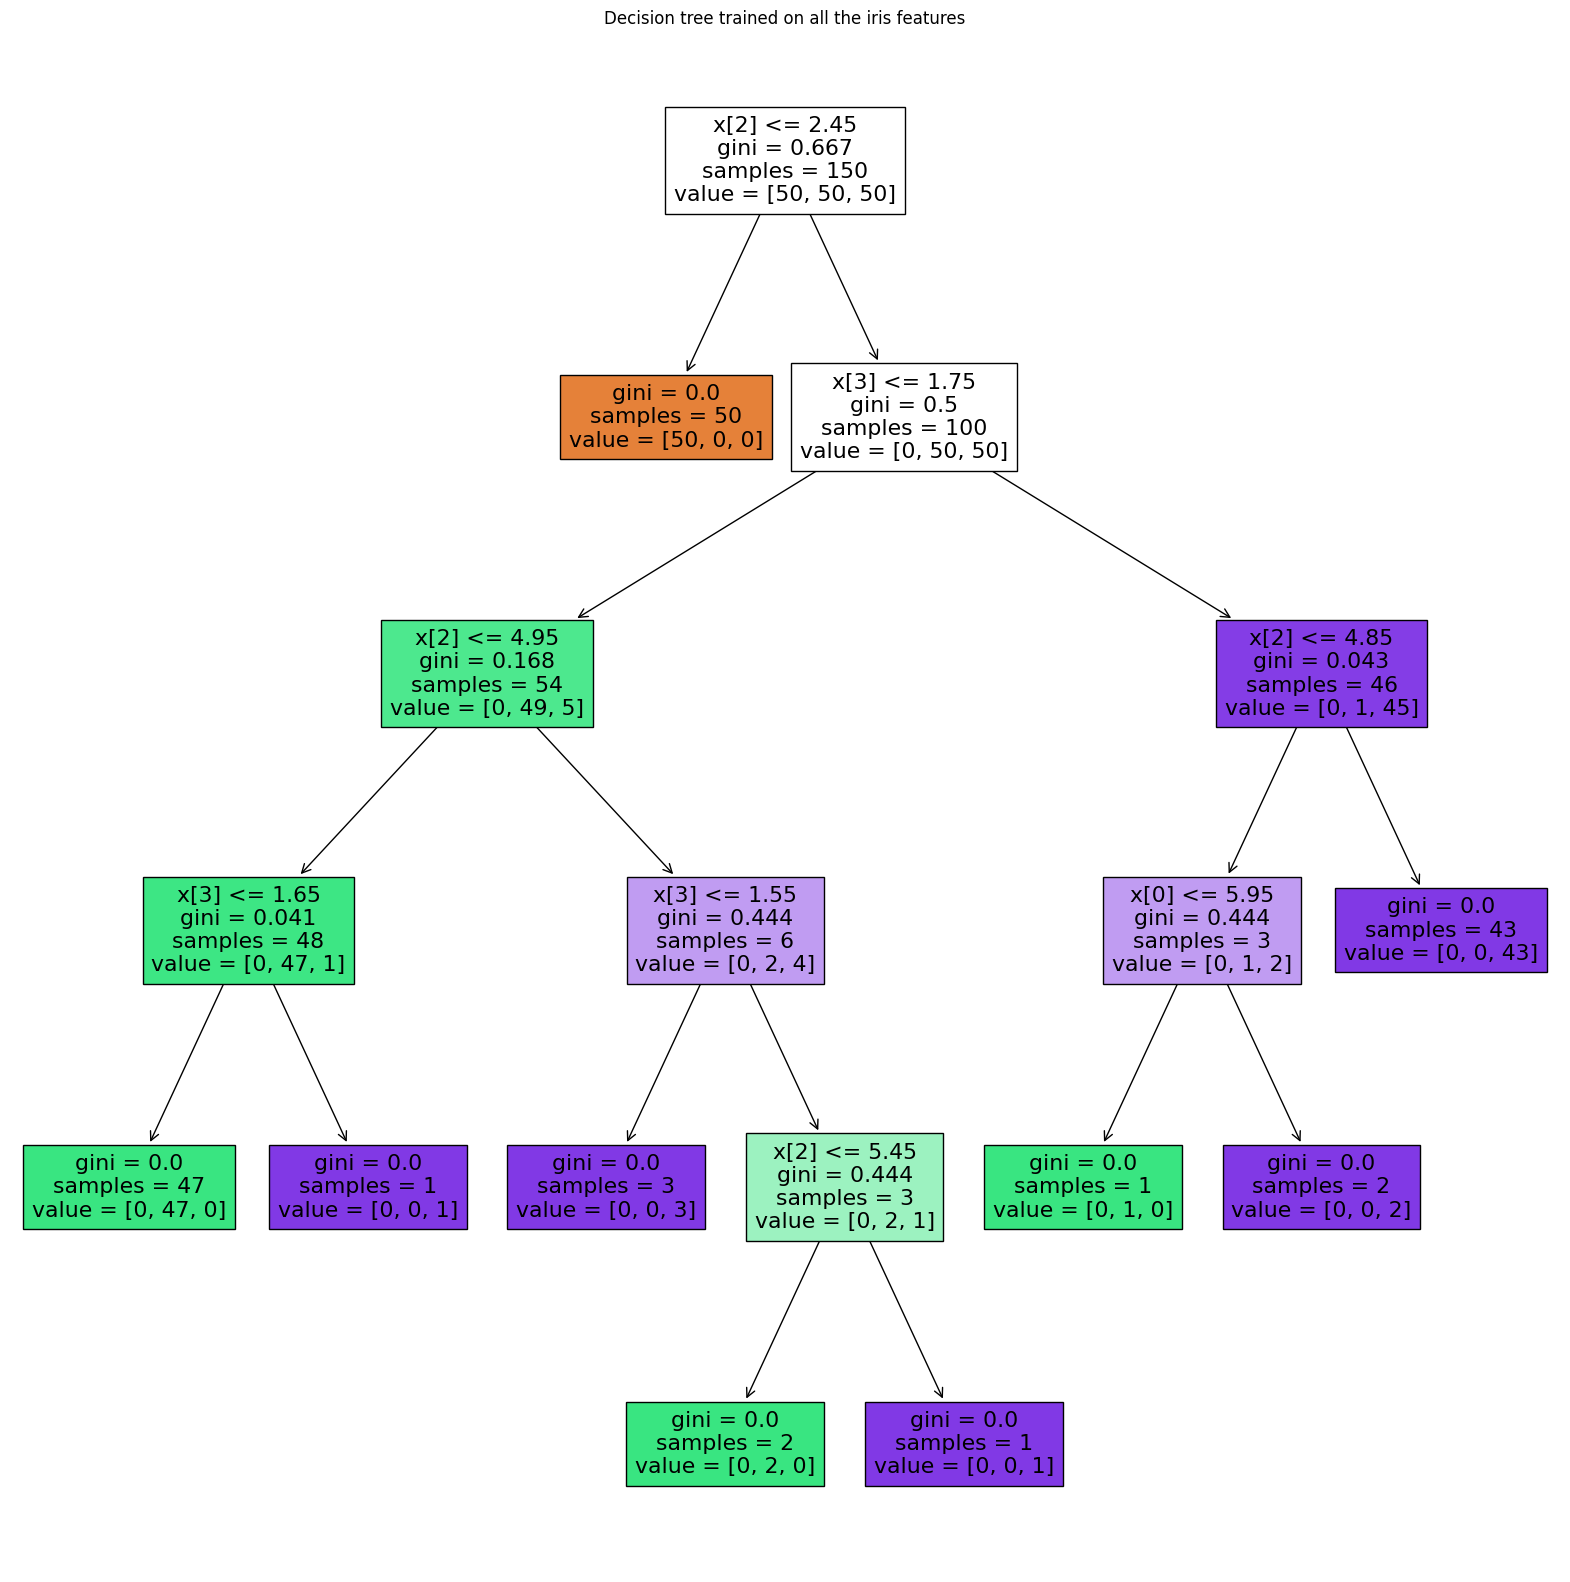

In [5]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

# Random Forest

+ [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. This is the most frequently used method. Sometimes it is even better than complicated neural network models.


Let's play with a more challenging dataset.

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
def load_wines(path):
    df = pd.read_csv(path)
    X = df.iloc[:, :-2].values
    y = df.iloc[:, -1].values
    return X, y

X, y = load_wines("wines.csv")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
dt = DecisionTreeClassifier().fit(X_train, y_train)

print("Decision Tree Accuracy (train):", accuracy_score(y_train, dt.predict(X_train)))
print("Decision Tree Accuracy (test):", accuracy_score(y_test, dt.predict(X_test)))

Decision Tree Accuracy (train): 1.0
Decision Tree Accuracy (test): 0.9444444444444444


In [10]:
rf = RandomForestClassifier().fit(X_train, y_train)

print("Random Forest Accuracy (train):", accuracy_score(y_train, rf.predict(X_train)))
print("Random Forest Accuracy (test):", accuracy_score(y_test, rf.predict(X_test)))

Random Forest Accuracy (train): 1.0
Random Forest Accuracy (test): 0.9722222222222222


### Play around with hyperparameters?

In [11]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strat

In [12]:
for max_depth in range(1,20):
    dt = DecisionTreeClassifier(max_depth=max_depth).fit(X_train, y_train)
    print(f'\nMax Depth: {max_depth}')
    dt_train = accuracy_score(y_train, dt.predict(X_train))
    dt_test = accuracy_score(y_test, dt.predict(X_test))
    print(f'DT Accuracy (train/test): {dt_train:.3f}/{dt_test:.3f}')


Max Depth: 1
DT Accuracy (train/test): 0.669/0.556

Max Depth: 2
DT Accuracy (train/test): 0.937/0.889

Max Depth: 3
DT Accuracy (train/test): 0.993/0.944

Max Depth: 4
DT Accuracy (train/test): 1.000/0.944

Max Depth: 5
DT Accuracy (train/test): 1.000/0.944

Max Depth: 6
DT Accuracy (train/test): 1.000/0.944

Max Depth: 7
DT Accuracy (train/test): 1.000/0.944

Max Depth: 8
DT Accuracy (train/test): 1.000/0.944

Max Depth: 9
DT Accuracy (train/test): 1.000/0.944

Max Depth: 10
DT Accuracy (train/test): 1.000/0.944

Max Depth: 11
DT Accuracy (train/test): 1.000/0.944

Max Depth: 12
DT Accuracy (train/test): 1.000/0.944

Max Depth: 13
DT Accuracy (train/test): 1.000/0.944

Max Depth: 14
DT Accuracy (train/test): 1.000/0.944

Max Depth: 15
DT Accuracy (train/test): 1.000/0.944

Max Depth: 16
DT Accuracy (train/test): 1.000/0.944

Max Depth: 17
DT Accuracy (train/test): 1.000/0.944

Max Depth: 18
DT Accuracy (train/test): 1.000/0.944

Max Depth: 19
DT Accuracy (train/test): 1.000/0.944


In [13]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  Trees in the forest use the best split strategy, i.e. equivalent to passing
 |  `splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
 |  The sub-sample size is controlled with the `max_samples` paramete

In [14]:
for num in [1,2,5,10,100]:
    rf = RandomForestClassifier(n_estimators=num).fit(X_train, y_train)
    print(f'\nNumber of estimators: {num}')
    rf_train = accuracy_score(y_train, rf.predict(X_train))
    rf_test = accuracy_score(y_test, rf.predict(X_test))
    print(f'RF Accuracy (train/test): {rf_train:.3f}/{rf_test:.3f}')


Number of estimators: 1
RF Accuracy (train/test): 0.993/0.972

Number of estimators: 2
RF Accuracy (train/test): 0.972/0.944

Number of estimators: 5
RF Accuracy (train/test): 0.993/0.944

Number of estimators: 10
RF Accuracy (train/test): 1.000/0.972

Number of estimators: 100
RF Accuracy (train/test): 1.000/0.972


# ANI project: RMSE vs MAE
+ You should aim for an RMSE < 3 kcal/mol, or MAE < 2 kcal/mol on the test set.
+ Compared to MAE, RMSE is usually numerically larger and more sensitive to outliers.
+ Be aware of the energy unit conversions!


$$ \mathrm{1\ Hartree = 627.5094738898777\ kcal/mol} $$

$$ \mathrm{RMSE} = \sqrt{\frac{1}{N}\sum_i (\hat{y}_i-y_i)^2} $$

$$ \mathrm{MAE} = \frac{1}{N}\sum_i |\hat{y}_i-y_i|$$

In [15]:
def rmse(y_pred, y_true):
    return np.sqrt(np.mean((y_pred - y_true) ** 2))
def mae(y_pred, y_true):
    return np.mean(np.abs(y_pred - y_true))

In [16]:
y_true = np.random.random(1000) * 20 - 10
y_pred = y_true + np.random.randn(1000) * 2

print('RMSE:',rmse(y_true, y_pred))
print('MAE:',mae(y_true, y_pred))

RMSE: 1.995830654993427
MAE: 1.5699117910938598
